In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

In [8]:
# Upload Excel file
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.ExcelFile(file_path)

Saving Book2.xlsx to Book2 (1).xlsx


In [9]:
df = data.parse('Sheet1')
display (df.head())

,Protein IDs,Alpha A30P_day_1_1,Alpha A30P_day_1_2,Alpha A30P_day_10_1,Alpha A30P_day_10_2,Alpha A53T_day_1_1,Alpha A53T_day_1_2,Alpha A53T_day_10_1,Alpha A53T_day_10_2,Alpha A53T_day_30_1,Alpha A53T_day_30_2,Alpha _day_1_1,Alpha _day_1_2,Alpha _day_10_1,Alpha _day_10_2,Alpha _day_30_1,Alpha _day_30_2
0,Q8T008;A8DY95;A1Z8A7,-0.630707,-1.048800,-1.363457,-1.449612,-0.991943,NaN,-1.464067,-1.939095,NaN,-2.285038,-1.144903,NaN,NaN,NaN,-0.646406,-1.390510
1,P12252-4;P12252-5;P12252;E2QD73;P12252-6;P1225...,-1.834030,-2.350706,-1.820311,-2.124629,-1.187871,NaN,-2.388733,-2.078198,NaN,-2.181804,-1.258322,-1.648779,-1.381122,-2.117787,-2.122366,-2.448194
2,Q9VIC9,-1.984845,NaN,-2.193833,-1.280685,-1.456999,NaN,-2.380521,-2.714633,-2.430820,-2.072483,NaN,NaN,-0.444125,-1.867121,NaN,-0.189960
3,Q7YU24;O18412,-1.037977,-1.583549,-1.725899,-2.042992,-0.804048,-1.256528,-1.649095,-1.301017,NaN,-1.980796,-0.954641,-1.284686,-1.517296,-2.158816,-0.537613,-0.992833
4,P08255,0.648926,-1.958981,-3.534981,0.174406,NaN,NaN,-0.967448,-1.357825,-0.627471,-1.930765,NaN,-0.369930,NaN,NaN,NaN,-3.020692


In [19]:
# Define conditions and colors
conditions = ['Alpha A30P_day_1_1', 'Alpha A30P_day_1_2', ' Alpha A30P_day_10_1',' Alpha A30P_day_10_2', ' Alpha A53T_day_1_1', ' Alpha A53T_day_1_2', ' Alpha A53T_day_10_1', ' Alpha A53T_day_10_2',  'Alpha A53T_day_30_1',  'Alpha A53T_day_30_2',' Alpha _day_1_1', ' Alpha _day_1_2', ' Alpha _day_10_1', ' Alpha _day_10_2',  'Alpha _day_30_1', ' Alpha _day_30_2' ]
num_conditions = len(conditions)

# Custom color palette (Choose your style)
colors = [
    '#1fa0b4',  # Alpha A30P_day_1_1  (blue)
    '#1f99b4',  # Alpha A30P_day_1_2  (green)
    '#ffa30e',  # Alpha A30P_day_10_1  (orange)
    '#ffcb0e',  # Alpha A30P_day_10_2  (purple)
    '#d62738',  # Alpha A53T_day_1_1 (red)
    '#d62738',  # Alpha A53T_day_1_2 (brown)
    '#c727d6',  # Alpha A53T_day_10_1 (pink)
    '#9627d6',   # Alpha A53T_day_10_2 (cyan)
    '#b9d627',  # Alpha A53T_day_30_1
    '#64d627',  # Alpha A53T_day_30_2
     '#d67627', # Alpha _day_1_1
     '#54270b', # Alpha _day_1_2
     '#ba7d75', # Alpha _day_10_1
     '#ba8a75', # Alpha _day_10_2
     '#bab175', # Alpha _day_30_1
     '#baa275', # Alpha _day_30_2
    ]

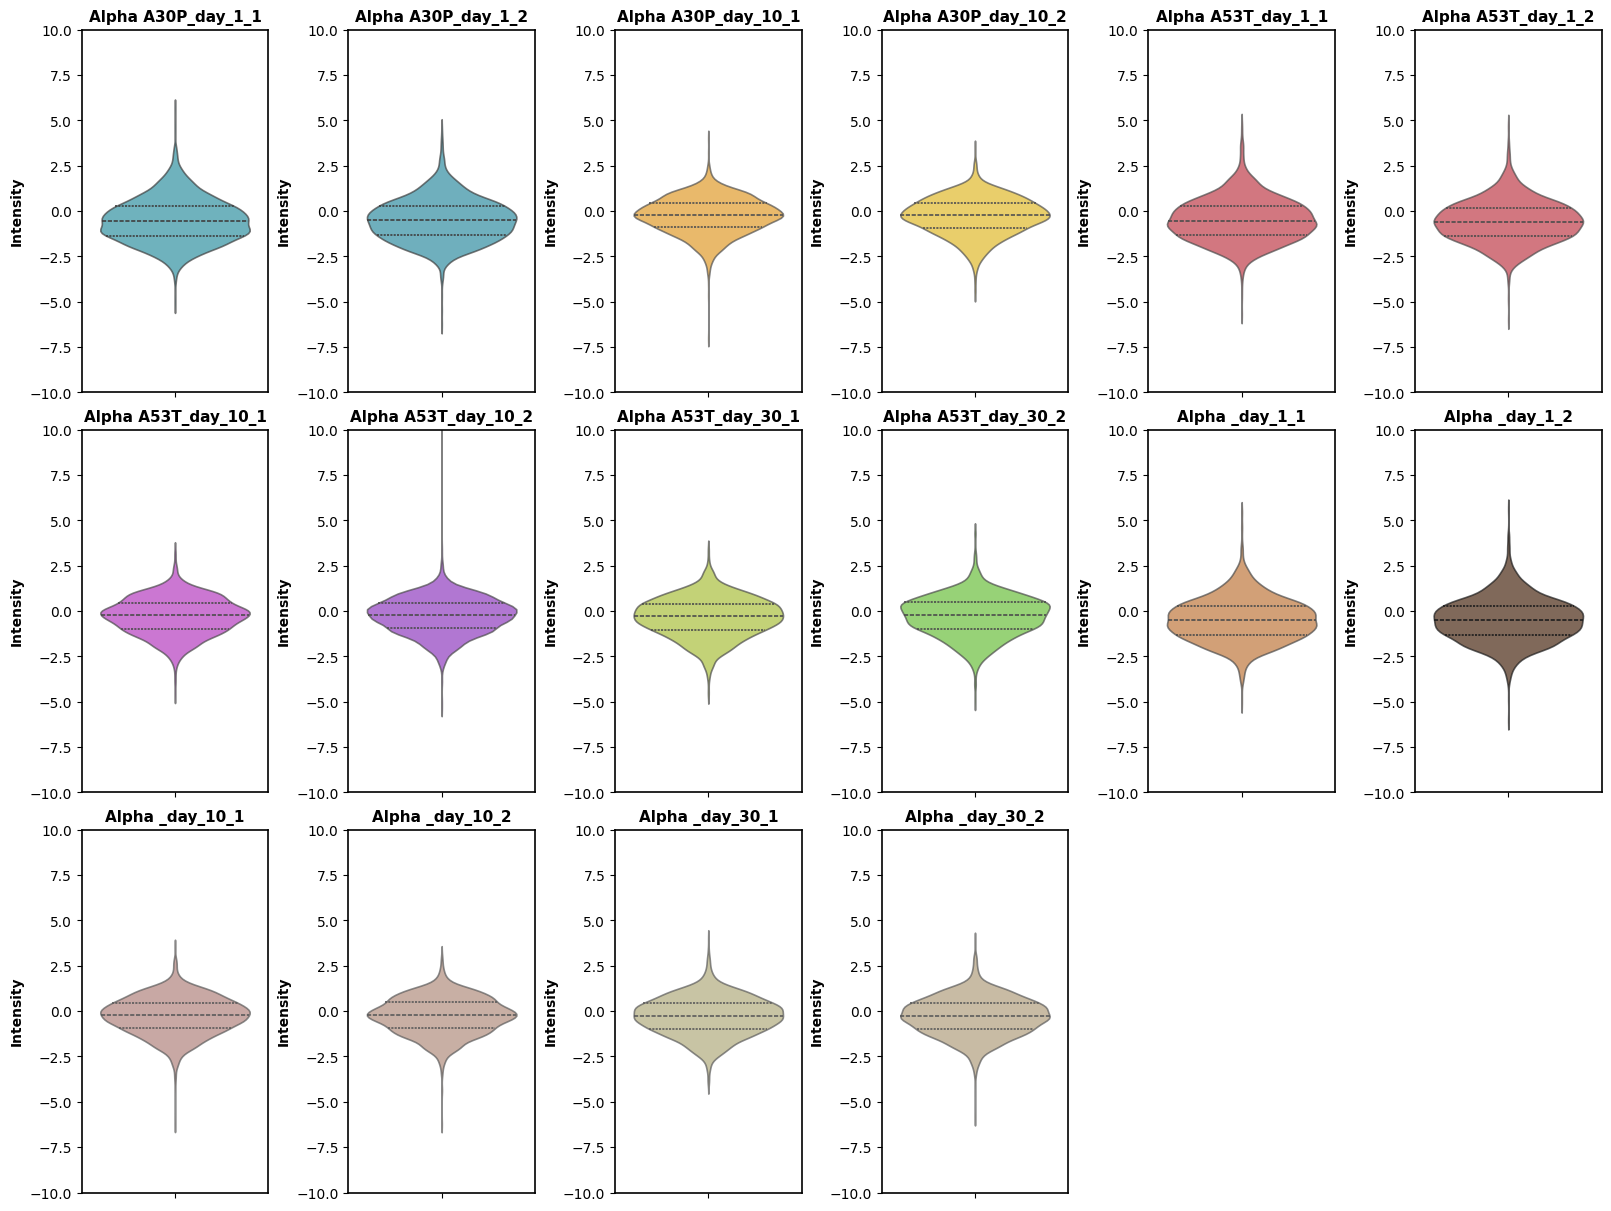

In [20]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(16, 12), constrained_layout=True)
axes = axes.flatten()

# Fix: Strip whitespace from DataFrame column names and conditions list elements
df.columns = df.columns.str.strip()
conditions = [c.strip() for c in conditions]

# Plot each violin plot
for i, (col, color) in enumerate(zip(conditions, colors)):
    sns.violinplot(y=df[col], ax=axes[i],
                   color=color,
                   inner='quartile',
                   linewidth=1.2,
                   alpha=0.7)
    axes[i].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Intensity', fontsize=10,fontweight='bold')
    axes[i].grid(False)
    axes[i].set_ylim(-10, 10) # Set y-axis limit to 10

    # Add visible borders
    for spine in axes[i].spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.2)

#  Remove unused subplots (in case fewer than 8)
for j in range(num_conditions, len(axes)):
    fig.delaxes(axes[j])

#  Save high-resolution images
png_path = 'ViolinPlot_600dpi.png'
pdf_path = 'ViolinPlot.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)
plt.show()